<a href="https://colab.research.google.com/github/kalinkabel/Portif-lios/blob/main/Projeto_Final_Machine_Learning_Lilian_Kalinka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fundamentos em Machine Learning - Projeto Final**

***Nesta atividade avaliativa você deverá demonstrar os conhecimentos adquiridos no curso, aplicando-os em uma tarefa de aprendizado supervisionado.***


*   Você deverá utilizar o conjunto de dados ***Social Network Ads***, disponível em: https://www.kaggle.com/rakeshrau/social-network-ads/download

> Este conjunto de dados (dataset) apresenta dados sobre usuários em uma rede social e seu comportamento de compra. O objetivo do seu projeto final é utilizar ML para responder se um determinado usuário, após clicar em um anúncio na rede social comprará ou não um determinado produto. (Purchased, 0 = não, 1 = sim)




*   Utilize as bibliotecas Numpy, Pandas, Matplotlib, Scikit-learn e outras que achar necessárias para realizar as atividades


In [ ]:
!pip install chart_studio



---



In [ ]:
# --- Importar as bibliotecas
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.graph_objects as go
import plotly.offline as py
from plotly.offline import iplot
plotly.offline.init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Definindo o renderizador:
import plotly.io as pio
pio.renderers.default = 'colab'

1.	Realizar a análise exploratória dos dados e aplicar técnicas de pré-processamento caso sejam necessárias

In [ ]:
# --- Importar o conjunto de dados
dados_sociais = pd.read_csv('/content/drive/MyDrive/Social_Network_Ads.csv')

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# --- Explorar o conjunto de dados 
dados_sociais.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
dados_sociais.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
#checando missing values
dados_sociais.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
#Remove User ID 
nds=dados_sociais.drop(['User ID'], axis=1)

In [ ]:
#Transforma Variável para numérica
labelEncoder = LabelEncoder()
labelEncoder.fit(nds['Gender'])
nds['Gender'] = labelEncoder.transform( nds['Gender'])

In [ ]:
nds.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


### **Visualização**

In [ ]:
#plota boxplot para visualização da escala dos dados e outliers
nds.iplot(kind='box')

In [ ]:
#Histograma da variável Gender onde 0=Female e 1= Male
nds['Gender'].iplot(kind='hist',colors='Blue')

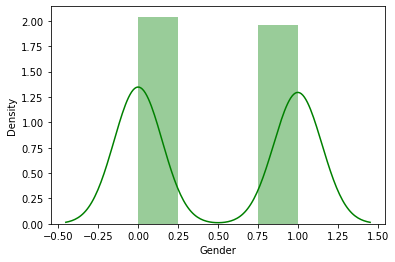

In [ ]:
#distribuição da coluna Gender
ax= sns.distplot(nds.Gender, color='g')

In [ ]:
#Histograma da variável Age
nds['Age'].iplot(kind='hist',colors='Blue')

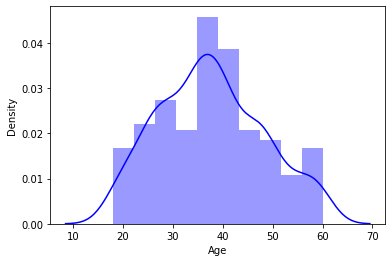

In [ ]:
#distribuição da coluna Age
ax= sns.distplot(nds.Age, color='b')

In [ ]:
#Histograma da variável EstimatedSalary
nds['EstimatedSalary'].iplot(kind='hist',colors='Blue')

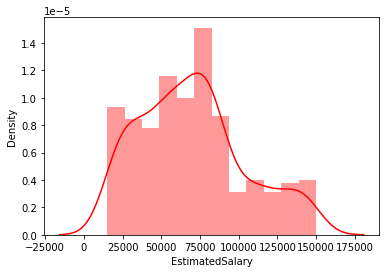

In [ ]:
#distribuição da coluna EstimatedSalary
ax= sns.distplot(nds.EstimatedSalary, color='r')

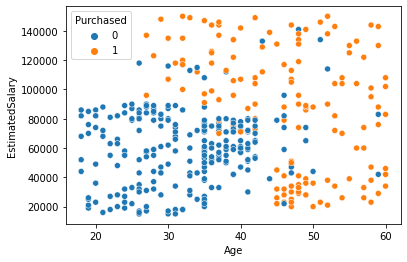

In [ ]:
sns.scatterplot('Age', 'EstimatedSalary', data = nds, hue = 'Purchased')

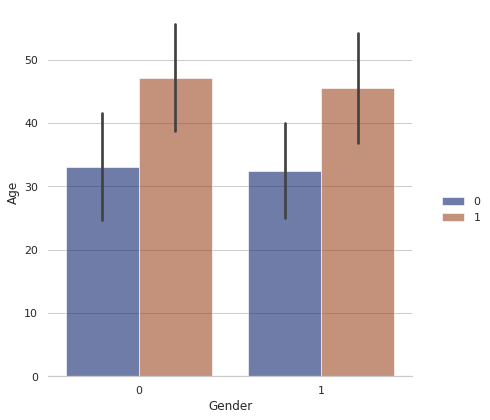

In [ ]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=nds, kind="bar",
    x="Gender", y="Age", hue="Purchased",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.legend.set_title("")

**Visualizando a distribuição das classes**

Verificando o desbalanceamento

In [ ]:
classe= nds.Purchased.value_counts()

In [ ]:
trace = go.Pie(labels= classe.index,
               values= classe.values,
               marker={'line':{'color':'#000000', 'width':2}},
               hoverinfo= 'label+percent+ value',
               pull = [0,0.06]
               )

data = [trace]

layout = go.Layout(title='Purchased')

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)


2.	Implementar ao menos um modelo de aprendizado supervisionado 

In [ ]:
#Separa dados e suas classes
X = nds.drop('Purchased', axis = 1)
y = nds['Purchased']

In [ ]:
X.shape,y.shape

((400, 3), (400,))

In [ ]:
#importa o StadardScaler da scikit-learn
from sklearn import preprocessing

In [ ]:
#cria o objeto scaler 
#aplicando o padronizador nos dados
scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(X)
x

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

In [ ]:
#Transforma em dataframe os dados padronizados
x_nds = pd.DataFrame(x)

In [ ]:
#visualizando os boxplot dos dados padronizados.
x_nds.iplot(kind='box')

3.	Implementar ao menos uma técnica de validação do desempenho do modelo

**Separando porção de treino e testes**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
#Desbalanceamento 
print(y_train.value_counts())

0    209
1    111
Name: Purchased, dtype: int64


**Aplicando MAchine Learning no Modelo**

In [ ]:
model1 = GaussianNB()
model2 = DecisionTreeClassifier()
model3 = KNeighborsClassifier(n_neighbors = 4)
model4 = SVC(kernel = 'rbf',  random_state = 2)
model5 = RandomForestClassifier(random_state=5)

modelo_ensemble = VotingClassifier(estimators=[('nb', model1),('dt', model2),('knn', model3),('svc',model4),('rfc',model5)]) 

modelo_ensemble.fit(x_train, y_train)

VotingClassifier(estimators=[('nb', GaussianNB()),
                             ('dt', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier(n_neighbors=4)),
                             ('svc', SVC(random_state=2)),
                             ('rfc', RandomForestClassifier(random_state=5))])

**Validação do Modelo**

In [ ]:
#Checa a acurácia do modelo
modelo_ensemble.score(x_test, y_test)

0.8625

**Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
clf_ensemble = VotingClassifier(estimators=[('nb', model1),('dt', model2),('knn', model3),('svc',model4),('rfc',model5)]) 
cv_scores = cross_val_score(clf_ensemble, x, y, cv=5)

In [ ]:
cv_scores.mean()

0.8825000000000001

**Relatório de Classificação**

In [ ]:
modelo_ensemble.fit(x_train,y_train)
y_pred = modelo_ensemble.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88        48
           1       0.78      0.91      0.84        32

    accuracy                           0.86        80
   macro avg       0.86      0.87      0.86        80
weighted avg       0.87      0.86      0.86        80



**Matriz de Confusão**

In [ ]:
print(pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1  All
Real                
0        40   8   48
1         3  29   32
All      43  37   80


**Aplicando RandomUnderSample**




In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler()
X_res, y_res = rus.fit_resample(x_train, y_train)

In [ ]:
print(y_train.value_counts()) #divisão conjunto de dados desbalanceada

0    209
1    111
Name: Purchased, dtype: int64


In [ ]:
print(y_res.value_counts()) #divisão conjunto de dados após undersample

1    111
0    111
Name: Purchased, dtype: int64


**Relatório de Classificação após UnderSample**

In [ ]:

modelo_ensemble.fit(X_res, y_res)
y_pred = modelo_ensemble.predict(x_test)

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.93      0.81      0.87        48
           1       0.76      0.91      0.83        32

    accuracy                           0.85        80
   macro avg       0.85      0.86      0.85        80
weighted avg       0.86      0.85      0.85        80



4.	Realizar análise do desempenho do modelo escolhido. Exemplos: indicar se foi necessário realizar algum pré-processamento nos dados, comentar sobre os hiperparâmetros usados, explicar os resultados e a técnica de validação utilizada, entre outras.

> Para realização da análise primeiro foi feito uma exploração dos dados com as informações, checando missing values, e describe. Após a exploração foi se necessário uma visualização para analisar como estavam as distribuições bem como o escalonamento e  outliers.E de acordo com as análises foi preciso realizar um pré-processamento nos dados usando padronizador StadardScaler para um melhor desempenho no modelo.Para fazer a implementação do desempenho utilizou-se uma técnica com um modelo de machine learning de ensemble com a junção das técnicas de modelos de GaussianNB,DecisionTreeClassifier,KNeighborsClassifier,SVM, RandomForestClassifier chegando uma validação de acurácia de 0.86% e para tentar melhorar esse resultado também foi aplicado uma validação cruzada e trouxe uma melhora nos resultados com um score de 0.88%. Observou -se com isso uma boa performace, porém, como os dados estavam desbalanceados e por isso passando por uma má generalização, e então aplicou-se uma técnica de balanceamento  RandomUnderSampler. Concluiu-se que mesmo utilizandoa o undersample não houve melhoras significativas nos resultados e deve- se também a quantidades de dados que não são suficientes para um bom desempenho no modelo.


